In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
path = "./dataset/2019 Winter Data Science Intern Challenge Data Set.xlsx"
df = pd.read_excel(path)

In [3]:
display(df.sample(6))
df.info()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
1391,1392.0,62.0,811.0,480.0,3.0,credit_card,2017-03-19 09:48:00.906
4772,4773.0,39.0,862.0,402.0,3.0,debit,2017-03-25 23:58:52.700
2951,2952.0,72.0,869.0,160.0,1.0,debit,2017-03-13 20:23:18.205
2116,2117.0,65.0,773.0,154.0,1.0,cash,2017-03-25 13:19:57.495
4198,4199.0,2.0,990.0,94.0,1.0,cash,2017-03-20 05:05:54.891
459,460.0,33.0,898.0,519.0,3.0,credit_card,2017-03-01 01:17:23.967


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        5000 non-null   float64       
 1   shop_id         5000 non-null   float64       
 2   user_id         5000 non-null   float64       
 3   order_amount    5000 non-null   float64       
 4   total_items     5000 non-null   float64       
 5   payment_method  5000 non-null   object        
 6   created_at      5000 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 273.6+ KB


In [4]:
df.columns.to_list()

['order_id',
 'shop_id',
 'user_id',
 'order_amount',
 'total_items',
 'payment_method',
 'created_at']

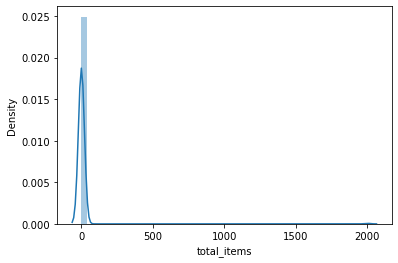

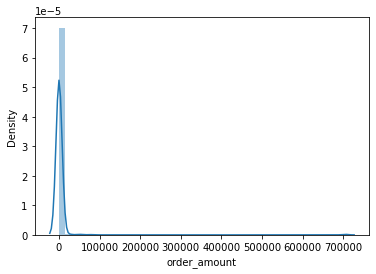

In [5]:
for col in ['total_items', 'order_amount']:
    sns.distplot(df[col])
    plt.show()

We can see there is an outlier in total items and order 
amount from the long tail towards the left of our distribution plot. Lets investigate further

In [6]:
display(df['total_items'].value_counts())

display(df['order_amount'].value_counts())

2.0       1832
1.0       1830
3.0        941
4.0        293
5.0         77
2000.0      17
6.0          9
8.0          1
Name: total_items, dtype: int64

153.0       87
306.0       85
354.0       82
160.0       75
156.0       75
            ..
730.0        1
450.0        1
470.0        1
154350.0     1
650.0        1
Name: order_amount, Length: 258, dtype: int64

In [7]:
display(df.groupby(['total_items']).nunique())
display(df.groupby(['order_amount']).nunique())

,order_id,shop_id,user_id,order_amount,payment_method,created_at
total_items,,,,,,
1.0,1830,100,299,58,3,1830
2.0,1832,100,300,58,3,1832
3.0,941,100,288,58,3,941
4.0,293,95,190,57,3,293
5.0,77,51,72,35,3,77
6.0,9,9,9,8,3,9
8.0,1,1,1,1,1,1
2000.0,17,1,1,1,1,12


,order_id,shop_id,user_id,total_items,payment_method,created_at
order_amount,,,,,,
90.0,18,1,18,1,3,18
94.0,25,1,25,1,3,25
101.0,15,1,14,1,3,15
111.0,16,1,15,1,3,16
112.0,48,2,45,1,3,48
...,...,...,...,...,...,...
51450.0,16,1,16,1,3,16
77175.0,9,1,9,1,2,9
102900.0,1,1,1,1,1,1


In [8]:
print('mean ', df['order_amount'].mean())
print('median ', df['order_amount'].median())

mean  3145.128
median  284.0


We definately have some outliers since our median and mean are so far apart we will conduct further analysis to get the cause.  
We can see some outliers in table above like total items purchased by one unique user was 2000, we can investigate this to see how it impacts our analysis.  
only three unique users purchased sneakers over $100000

In [9]:
df[df['total_items'] == 2000]

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
15,16.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-07 04:00:00
60,61.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-04 04:00:00
520,521.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-02 04:00:00
1104,1105.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-24 04:00:00
1362,1363.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-15 04:00:00
1436,1437.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-11 04:00:00
1562,1563.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-19 04:00:00
1602,1603.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-17 04:00:00
2153,2154.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-12 04:00:00
2297,2298.0,42.0,607.0,704000.0,2000.0,credit_card,2017-03-07 04:00:00


from our analysis only one of customer user_id = 607 orders  up to 2000 sneakers  which skew our data and he purchases them only from shop 42.

In [10]:
df[df['user_id'] != 607]['order_amount'].mean()

754.0919125025085

<AxesSubplot:xlabel='total_items', ylabel='order_amount'>

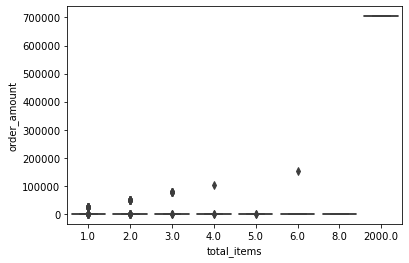

In [11]:
df2 = df[df['user_id'] != 607]
sns.boxplot(x=df['total_items'], y=df['order_amount'])

Let check if a customer buys an overly expensive sneaker. Since our shops sell
similar sneakers the price of sneakers should be within a range. The maximum price
of a sneaker is `$704000`. Lets bin the price ranges to see if we find outliers.

In [12]:
bins = [100, 500, 1000, 5000, 10000, 
       50000, 100000, 500000,1000000]

pd.cut(df2['order_amount'], bins=bins).value_counts()

(100, 500]           4321
(500, 1000]           565
(50000, 100000]        25
(10000, 50000]         19
(1000, 5000]            8
(100000, 500000]        2
(5000, 10000]           0
(500000, 1000000]       0
Name: order_amount, dtype: int64

<AxesSubplot:xlabel='order_amount', ylabel='Density'>

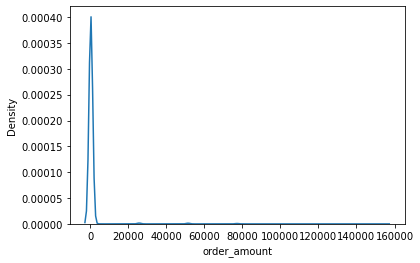

In [13]:
sns.kdeplot(df2['order_amount'])

Lets perform analysis on items with price greater than 1000 
as most of orders have prices below 1000

In [14]:
print(len(df2[df2['order_amount'] > 1000]), 'orders with price greater than $1000')
df3 = df2[df2['order_amount'] > 1000]

54 orders with price greater than $1000


In [15]:
display(df3.groupby('shop_id').count())
display(df3.groupby('total_items').count())

,order_id,user_id,order_amount,total_items,payment_method,created_at
shop_id,,,,,,
42.0,6,6,6,6,6,6
43.0,1,1,1,1,1,1
54.0,1,1,1,1,1,1
78.0,46,46,46,46,46,46


,order_id,shop_id,user_id,order_amount,payment_method,created_at
total_items,,,,,,
1.0,19,19,19,19,19,19
2.0,16,16,16,16,16,16
3.0,12,12,12,12,12,12
4.0,3,3,3,3,3,3
5.0,1,1,1,1,1,1
6.0,2,2,2,2,2,2
8.0,1,1,1,1,1,1


Shop 78 seems like an expensive shop we can remove it to avoid skewing our data it accounts for 42/54 sneaker with price over $1000

In [16]:
print('minimum order amount of sneaker in shop 78 is', 
      df[df['shop_id']==78]['order_amount'].min())
df[df['shop_id']==78]

minimum order amount of sneaker in shop 78 is 25725.0


,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161.0,78.0,990.0,25725.0,1.0,credit_card,2017-03-12 05:56:56.834
490,491.0,78.0,936.0,51450.0,2.0,debit,2017-03-26 17:08:18.911
493,494.0,78.0,983.0,51450.0,2.0,cash,2017-03-16 21:39:35.400
511,512.0,78.0,967.0,51450.0,2.0,cash,2017-03-09 07:23:13.640
617,618.0,78.0,760.0,51450.0,2.0,cash,2017-03-18 11:18:41.848
691,692.0,78.0,878.0,154350.0,6.0,debit,2017-03-27 22:51:43.203
1056,1057.0,78.0,800.0,25725.0,1.0,debit,2017-03-15 10:16:44.830
1193,1194.0,78.0,944.0,25725.0,1.0,debit,2017-03-16 16:38:25.551
1204,1205.0,78.0,970.0,25725.0,1.0,credit_card,2017-03-17 22:32:21.438
1259,1260.0,78.0,775.0,77175.0,3.0,credit_card,2017-03-27 09:27:19.843


In [17]:
df2 = df2[df2['shop_id']!=78]
aov = df2['order_amount'].mean()
aov

302.58051448247926

by removing shop 72 we have reduced the price of our AOV to `$302.58`  
Since `$302.58` as our mean is not so far from `$284.00`. We can stop our analysis here

####  a

   The formulae used is wrong we average order value is divided by the total number of items taken not total number of orders made. 
 From my analysis the naive AOV was high due to some outliers in our data set we have a customer with user_id 604 who always purchase 2000 sneaker compared to other customers who purchase 1-10 sneakers.
  Also shop 78 sells exclusively expensive sneakers with minimum order amount at `$25725.0` which increased our AOV.
After removing these outliers we got a relastic naive AOV of `$302`

 The problem with our AOV is an outlier shop and an outlier customer in our dataset. Removing the outliers our AOV is `$302.58`

#### b
A better metric for our dataset is customer live time value
which calculates the total amount of money we make per customer
through out our relationship with them. This can help us make better decisions and know which type of customer we should focus
our marketing campaigns. But we only have enough data for customer value as our data grows we will get the customer live time value. For now we will use customer value as our metric

  
customer value cv  
purchase frequency pf  
purchase frequency = total_orders/total_customers  
customer value = pf * aov

In [18]:
total_orders = df2['order_id'].nunique()
total_customers = df2['user_id'].nunique()
pf = total_orders / total_customers
cv = aov * pf
cv

4979.466666666667

### summary
a. There is nothing wrong with our calculation.   
A better way to evaluate the data will be to remove outliers before calculating average

b. I would use customer value as a metric to report this data    

c.  
Our customer value is $4979.46

## Question 2

### a

SQL Statement:  
`
SELECT Count(orderid) AS 'number_of_orders'
FROM orders;
`
Result:
`
Number of Records: 1
number_of_orders
196
`

### b


SQL Statement:  
`
SELECT COUNT(orderid) AS total_employee_orders, LastName
FROM orders JOIN employees 
ON orders.employeeid = employees.employeeid
GROUP BY orders.employeeid
ORDER BY COUNT(orderid) DESC
LIMIT 1;
`

Result:  
`
Number of Records: 1
number_of_orders	LastName
40	Peacock
`

### c

SQL Statement:  
`
SELECT p.productname, count(p.productid) total_product_order
FROM orderdetails od LEFT JOIN products p 
ON od.productid = p.productid
LEFT JOIN orders
ON orders.orderid = od.orderid
LEFT JOIN customers c
ON orders.customerid = c.customerid
WHERE COUNTRY LIKE 'Germany'
GROUP BY p.productid
ORDER BY count(p.productid) DESC
LIMIT 1;
`

Result:  
`
Number of Records: 1
ProductName	total_product_order
Gorgonzola Telino	5
`


### Summary Report
#### a. 
196 orders where shipped by speedy Express in total
#### b.
Peacock is the last name of the employee with most order
#### c.
Gorgonzola Telino is the most order product by German customers